In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import random
np.random.seed(1001)
random.seed(1001)

# Create parameters

In [3]:
ms = [20, 30, 40, 25, 35]
ns = [30, 40, 25, 35, 20]
params = ob.sc_params(ms, ns)

# Distributed solution with limited memory $m$

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 150
memory = [20, 30, 50, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, memory=m, print_freq=10, minorant_update='agg_lin')
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 20


k=0, rel_gap=inf, L=-2472.706641209428, U=3936.4781972599376, L0=-2472.706641209428
k=10, rel_gap=inf, L=-385.28503319299557, U=2.08903090403669, L0=-385.28503319299557
k=20, rel_gap=0.7709173491537098, L=-171.5223906293079, U=-96.85510772779736, L0=-171.5223906293079
rho=117.59802709653134
k=30, rel_gap=0.3501529305878005, L=-138.71079997008655, U=-102.73710246268001, L0=-139.7126785114615
k=40, rel_gap=0.300852219254091, L=-137.79170768649328, U=-105.92418235293712, L0=-137.79170768649328
k=50, rel_gap=0.23747116421718883, L=-133.77155936455893, U=-108.10074871456209, L0=-139.63003446309085
k=60, rel_gap=0.11654892235654497, L=-123.17303334192457, U=-110.3158409592661, L0=-127.42381042632769
k=70, rel_gap=0.047996628318410894, L=-116.49780006068886, U=-111.16238059622225, L0=-116.49780006068886
k=80, rel_gap=0.03328542023702585, L=-115.61668196506935, U=-111.89229974671275, L0=-129.06730190341386
k=90, rel_gap=0.029272957399275403, L=-115.61668196506935, U=-112.32849472428074, L0=-11

# Centralized solution

In [6]:
h_cvx = ob.cvx_supply_chain(params=params)[0]
print(f"{h_cvx=}")

h_cvx=-112.56431835964304


# Plot

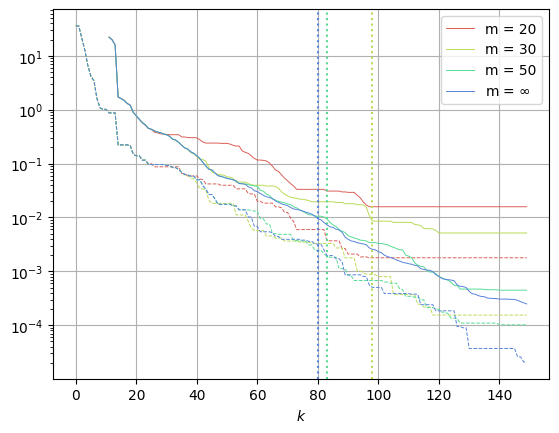

In [10]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx, filename='sc_fin_memory_agg.pdf')

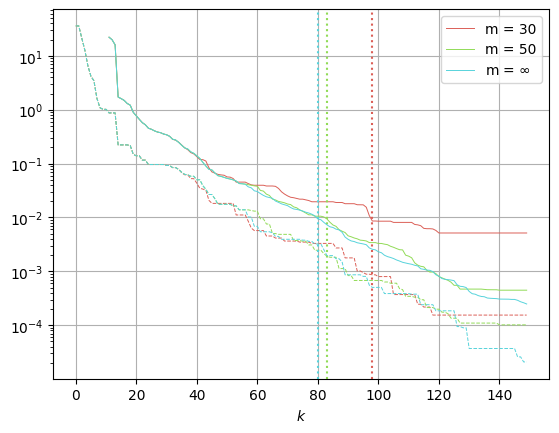

In [12]:
os.plot_finite_memory(memory_bounds=memory_bounds, memory=[30, 50, max_iter], h_true=h_cvx, filename='sc_fin_memory_agg_3.pdf')